In [1]:
# Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Usaremos el dataset Pima Indian diabetes de kaggle
- https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv


In [2]:
#Cargamos el dataset a utilizar
df_diabetes = pd.read_csv("datasets/pima-indians-diabetes.csv",sep=",")

## Exploracion de datos

In [3]:
# Visualizamos del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
35,11,138,76,0,0,33.2,0.420,35,0
70,5,139,64,35,140,28.6,0.411,26,0
2,1,89,66,23,94,28.1,0.167,21,0
484,0,135,68,42,250,42.3,0.365,24,1
78,2,112,66,22,0,25.0,0.307,24,0
552,1,88,62,24,44,29.9,0.422,23,0
21,7,196,90,0,0,39.8,0.451,41,1
575,6,108,44,20,130,24.0,0.813,35,0
643,3,103,72,30,152,27.6,0.730,27,0
444,0,180,78,63,14,59.4,2.420,25,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [4]:
# Asignamos los nombres de las columnas

df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [5]:
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
# analizamos el shape del objeto
# 767 ejemplos de 8 caracteris y 1 target
print(df_diabetes.shape)

(767, 9)


In [7]:
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento del modelo

In [8]:
# Separamos los datos
X = df_diabetes.drop("9. Class variable (0 or 1)", axis=1)
y = df_diabetes["9. Class variable (0 or 1)"]

In [9]:
# importamos librerias para la creacion del modelo
from sklearn.model_selection import train_test_split

# 30% test 70% train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [10]:
# Arbol de decision
from sklearn.ensemble import RandomForestClassifier

# Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=0)

In [11]:
# Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [12]:
# Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluacion del modelo

In [13]:
# Calculo de metricas
from sklearn.metrics import accuracy_score

# calculo accuracy train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.9850746268656716
Test Accuracy:  0.7445887445887446


In [14]:
# verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), 
     "importance": random_forest.feature_importances_}).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

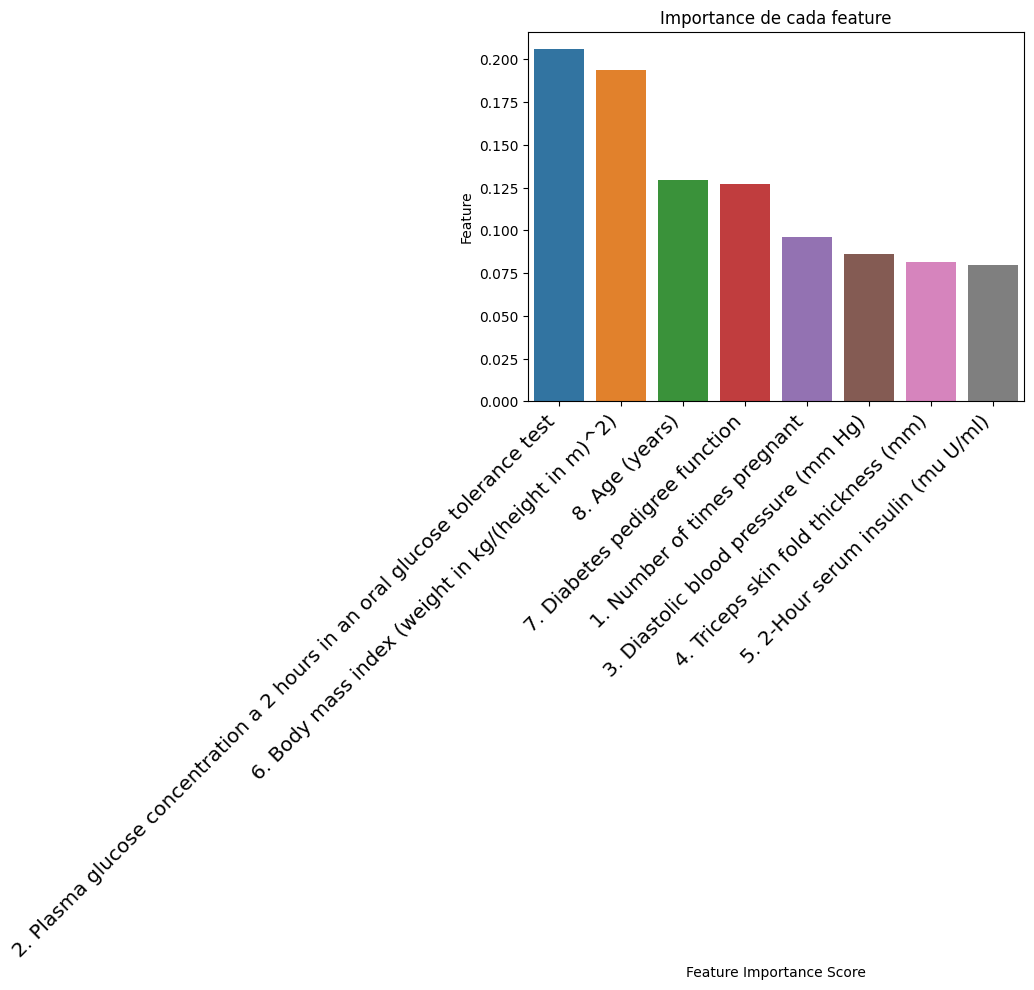

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Importance de cada feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

In [19]:
from sklearn.model_selection import GridSearchCV
parametros = {
    "n_estimators" : range(1,51),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(2,11)
}

rf_grid = GridSearchCV(
    random_forest, 
    parametros, 
    cv=5, 
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
).fit(X_train,y_train)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


In [ ]:
#rf_grid.cv_results_

In [25]:
import numpy as np

In [39]:
id_test_score = np.argmax(rf_grid.cv_results_["mean_test_score"])
print(rf_grid.cv_results_["mean_test_score"][id_test_score])
print(rf_grid.cv_results_["rank_test_score"][id_test_score])
print(rf_grid.cv_results_["params"][id_test_score])

0.7686050536517827
1
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 18}


In [29]:
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 18}

In [32]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=18, random_state=0)

In [33]:
rf_grid.best_score_

0.7686050536517827

In [44]:
# ranking de los arboles
trees_score_df = pd.DataFrame(
    {"mean_score": rf_grid.cv_results_["mean_test_score"], 
     "ranking": rf_grid.cv_results_["rank_test_score"]}).sort_values("ranking", ascending=True)

trees_score_df.head()

,mean_score,ranking
167,0.768605,1
124,0.766788,2
169,0.766736,3
209,0.766684,4
317,0.764988,5


In [46]:
trees_score_samples_df = trees_score_df[::100]
trees_score_samples_df.head()

,mean_score,ranking
167,0.768605,1
888,0.755538,98
233,0.751835,196
590,0.748131,301
1016,0.746210,396


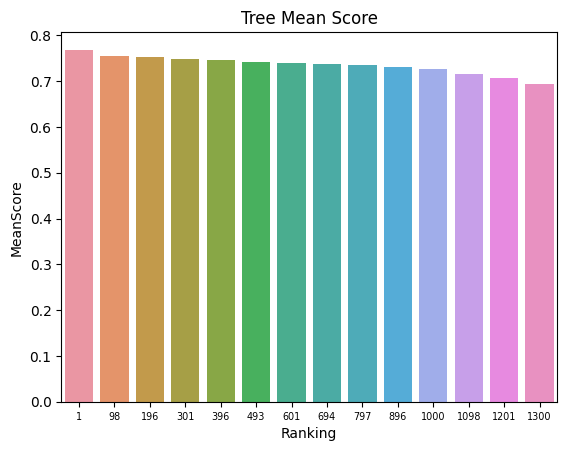

In [50]:
sns.barplot(x=trees_score_samples_df.ranking, y=trees_score_samples_df.mean_score)
plt.xlabel("Ranking")
plt.ylabel("MeanScore")
plt.title("Trees Mean Score")
plt.xticks(fontsize="x-small")
plt.show()